# Exercise 01 : Line chart with styles
### You need to create exactly the same graph as below (both values and style):
* analyze only the users and not the admins
* analyze only the dates when there were both views and checker commits
* use size of the font should be 8
* the size of the figure is (15,8)
* at the end of your Jupyter Notebook create a markdown cell and insert the question:

In [8]:
import pandas as pd
import sqlite3

In [9]:
con = sqlite3.connect('../data/checking-logs.sqlite')

In [10]:
df = pd.read_sql("""
                 WITH views AS (SELECT DATE (datetime) as date, count (*) AS views
                 FROM pageviews
                 WHERE uid LIKE 'user_%'
                 GROUP BY date),
                     commits AS (
                 SELECT DATE (timestamp) as date, count (*) AS commits
                 FROM checker
                 WHERE uid LIKE 'user_%'
                 GROUP BY date)
                 SELECT v.date, v.views, p.commits
                 FROM views v
                          JOIN commits p ON v.date = p.date
""", con)

In [11]:
df

,date,views,commits
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,28
5,2020-04-23,5,43
6,2020-04-25,1,104
7,2020-04-26,8,261
8,2020-04-28,2,5
9,2020-04-29,4,17


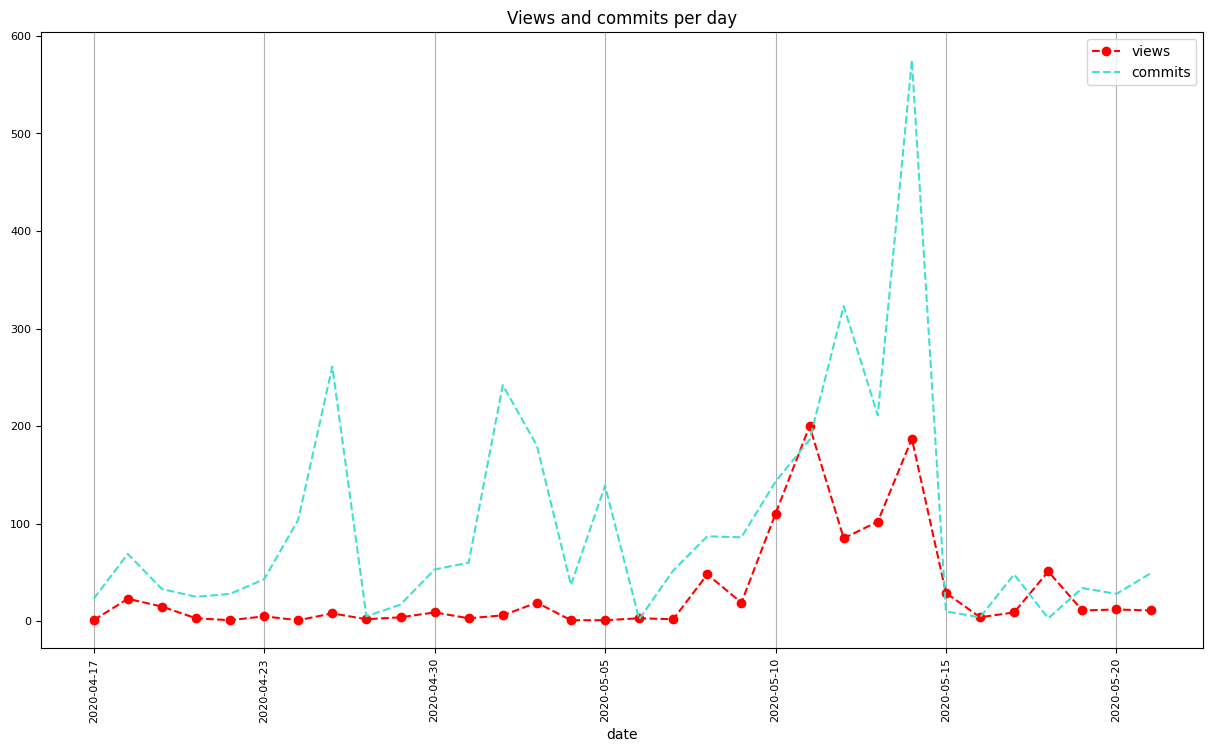

In [12]:
plt = df.plot(
    x='date',
    title='Views and commits per day',
    xlabel='date',
    fontsize=8,
    figsize=(15, 8),
    style=['--o','--'],
    color=['red', 'turquoise']
)
plt.tick_params(axis='x', rotation=90)
plt.grid(axis='x')

In [13]:
con.close()

Question: How many times was the number of views larger than 150?

In [14]:
df[df['views'] > 150]

,date,views,commits
21,2020-05-11,200,186
24,2020-05-14,187,575


Answer: 2 times